# Gradient Descent
This notebook will build and implement both batch gradient descent and stochastic gradient descent models from scratch, then implement it with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv).

In [74]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [75]:
#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

#Setting x and y
X = df.YearsAtCompany
y = df.YearsSinceLastPromotion

## Batch Gradient Descent

In [76]:
#Creating the function for batch gradient descent
def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 #parameters
    log, mse = [], [] #lists to store learning
    N = len(X) #number of samples
    
    for __ in range(epoch):
        f = y - (m * X + b)
        
        #update m and b
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

MSE: 6.415446172808255


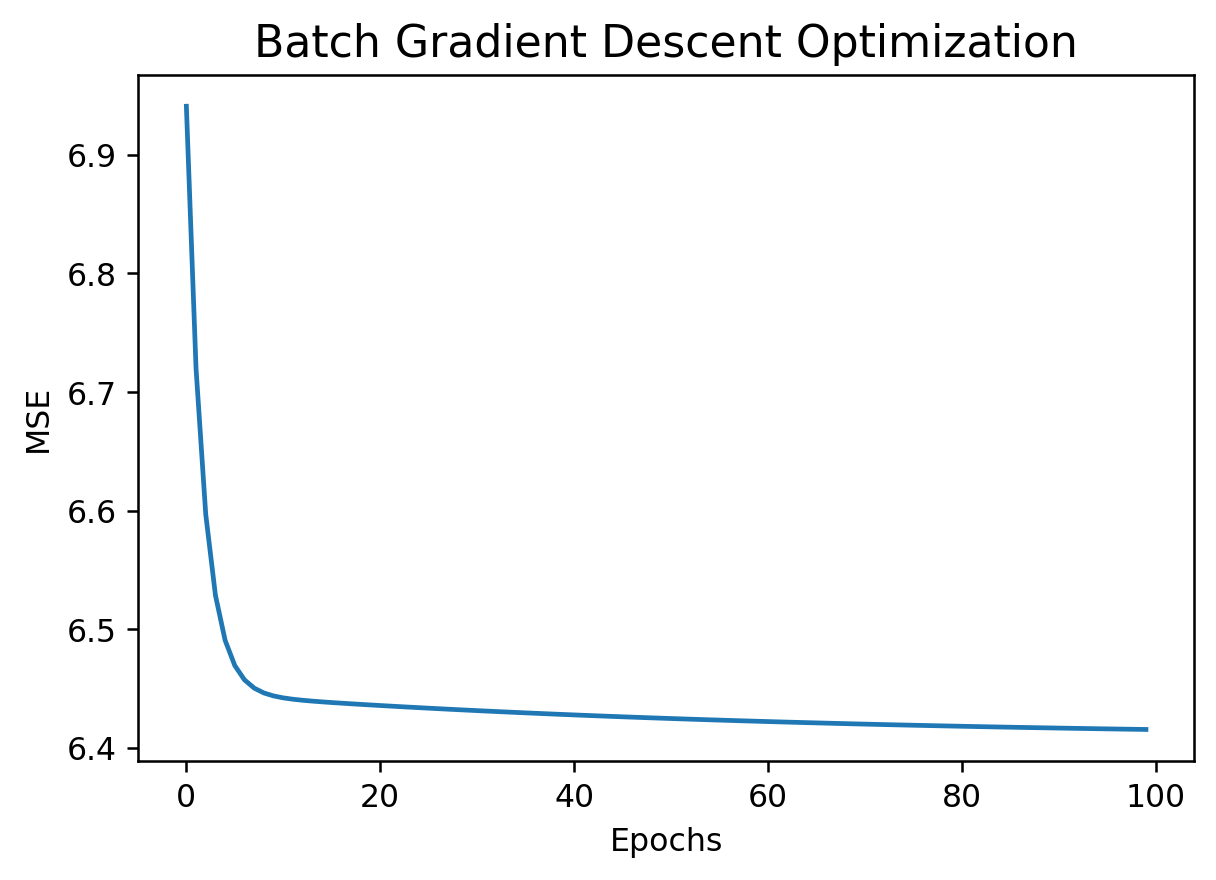

In [77]:
#Running the model
m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 100)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.plot(range(len(mse)), mse)
plt.title('Batch Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## Stochastic Gradient Descent

In [78]:
def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 10, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

MSE: 12.358655740697092


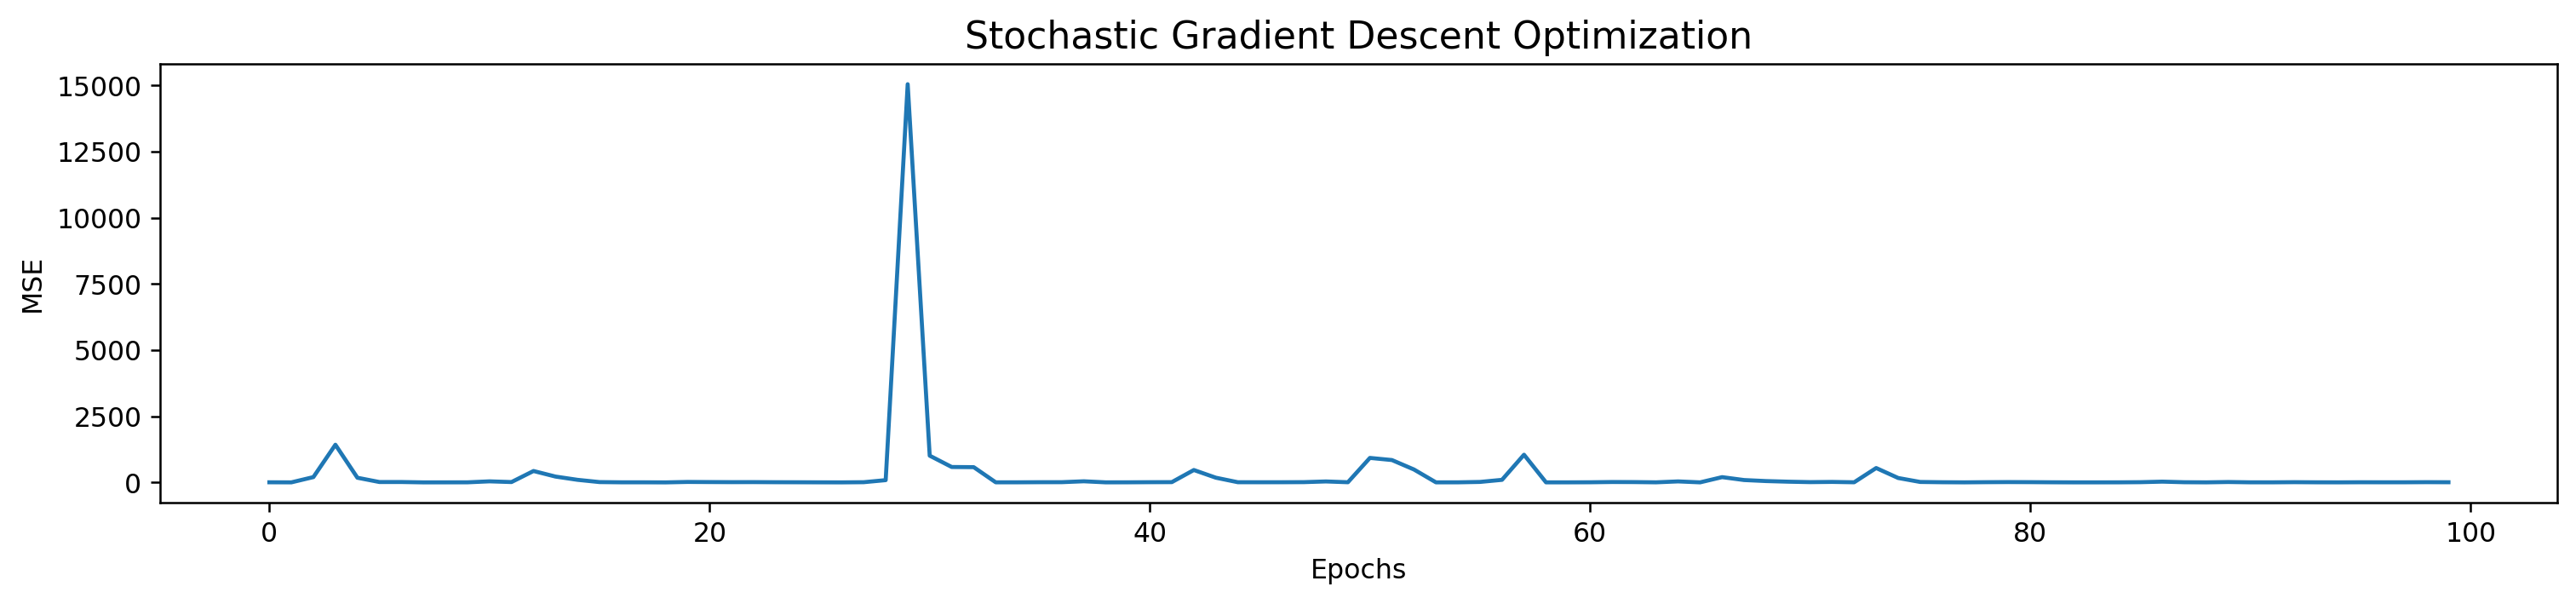

In [79]:
#Running the model
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.01, epoch = 100, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('Stochastic Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()